# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

In [111]:
import pandas as pd
from matplotlib.pyplot import colorbar

### Question 1

#### Read the dataset

In [112]:
df = pd.read_csv('07-03-2020.csv')

#### Display the top 5 rows in the data

In [113]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-04 04:33:51,34.223334,-82.461707,118,0,0,118,"Abbeville, South Carolina, US",481.102459,0.000000
1,22001.0,Acadia,Louisiana,US,2020-07-04 04:33:51,30.295065,-92.414197,968,39,0,929,"Acadia, Louisiana, US",1560.157950,4.028926
2,51001.0,Accomack,Virginia,US,2020-07-04 04:33:51,37.767072,-75.632346,1042,14,0,1028,"Accomack, Virginia, US",3224.408962,1.343570
3,16001.0,Ada,Idaho,US,2020-07-04 04:33:51,43.452658,-116.241552,2507,23,0,2484,"Ada, Idaho, US",520.570530,0.917431
4,19001.0,Adair,Iowa,US,2020-07-04 04:33:51,41.330756,-94.471059,15,0,0,15,"Adair, Iowa, US",209.731544,0.000000


#### Show the information of the dataset

In [114]:
df.info

<bound method DataFrame.info of          FIPS     Admin2    Province_State  Country_Region  \
0     45001.0  Abbeville    South Carolina              US   
1     22001.0     Acadia         Louisiana              US   
2     51001.0   Accomack          Virginia              US   
3     16001.0        Ada             Idaho              US   
4     19001.0      Adair              Iowa              US   
...       ...        ...               ...             ...   
3829      NaN        NaN           Unknown         Ukraine   
3830      NaN        NaN               NaN           Nauru   
3831      NaN        NaN              Niue     New Zealand   
3832      NaN        NaN               NaN          Tuvalu   
3833      NaN        NaN  Pitcairn Islands  United Kingdom   

              Last_Update        Lat       Long_  Confirmed  Deaths  \
0     2020-07-04 04:33:51  34.223334  -82.461707        118       0   
1     2020-07-04 04:33:51  30.295065  -92.414197        968      39   
2     2020

#### Show the sum of missing values of features in the dataset

In [115]:
df.isnull().sum()

FIPS                   716
Admin2                 712
Province_State         177
Country_Region           0
Last_Update              0
Lat                     78
Long_                   78
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incidence_Rate          78
Case-Fatality_Ratio     71
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [116]:
confirmed_Cases = df.groupby('Country_Region')['Confirmed'].sum()
print(confirmed_Cases)

Country_Region
Afghanistan             32410
Albania                  2752
Algeria                 15070
Andorra                   855
Angola                    328
                        ...  
West Bank and Gaza       3334
Winter Olympics 2022        0
Yemen                    1240
Zambia                   1632
Zimbabwe                  625
Name: Confirmed, Length: 197, dtype: int64


#### Show the number of Deaths by Country

In [117]:
deaths = df.groupby('Country_Region')['Deaths'].sum()
print(deaths)

Country_Region
Afghanistan             823
Albania                  72
Algeria                 937
Andorra                  52
Angola                   18
                       ... 
West Bank and Gaza       11
Winter Olympics 2022      0
Yemen                   335
Zambia                   30
Zimbabwe                  7
Name: Deaths, Length: 197, dtype: int64


#### Show the number of Recovered cases by Country

In [118]:
Recovered_cases = df.groupby('Country_Region')['Recovered'].sum()
print(Recovered_cases)

Country_Region
Afghanistan             17331
Albania                  1592
Algeria                 10832
Andorra                   800
Angola                    107
                        ...  
West Bank and Gaza        463
Winter Olympics 2022        0
Yemen                     536
Zambia                   1348
Zimbabwe                  176
Name: Recovered, Length: 197, dtype: int64


#### Show the number of Active Cases by Country

In [119]:
active_Cases = df.groupby('Country_Region')['Active'].sum()
print(active_Cases)

Country_Region
Afghanistan             14256
Albania                  1088
Algeria                  3301
Andorra                     3
Angola                    203
                        ...  
West Bank and Gaza       2860
Winter Olympics 2022        0
Yemen                     369
Zambia                    254
Zimbabwe                  442
Name: Active, Length: 197, dtype: int64


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [120]:
df['Last_Update'] = pd.to_datetime(df['Last_Update'])

latest_by_country = df.groupby('Country_Region')['Last_Update'].max().reset_index()

latest_update = df.merge(latest_by_country, on=['Country_Region', 'Last_Update'], how='inner')

country_latest = latest_update.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

print(country_latest)

                      Confirmed  Deaths  Recovered  Active
Country_Region                                            
Afghanistan               32410     823      17331   14256
Albania                    2752      72       1592    1088
Algeria                   15070     937      10832    3301
Andorra                     855      52        800       3
Angola                      328      18        107     203
...                         ...     ...        ...     ...
West Bank and Gaza         3334      11        463    2860
Winter Olympics 2022          0       0          0       0
Yemen                      1240     335        536     369
Zambia                     1632      30       1348     254
Zimbabwe                    625       7        176     442

[197 rows x 4 columns]


### Question 3

### Show the countries with no recovered cases

In [121]:
country_totals = df.groupby('Country_Region')['Recovered'].sum()
# print(country_totals)
no_recovered = country_totals[country_totals == 0]
print(no_recovered)


Country_Region
Antarctica              0
Kiribati                0
Korea, North            0
MS Zaandam              0
Nauru                   0
Palau                   0
Samoa                   0
Summer Olympics 2020    0
Sweden                  0
Tonga                   0
Tuvalu                  0
Winter Olympics 2022    0
Name: Recovered, dtype: int64


#### Show the countries with no confirmed cases

In [122]:
total_confirmed_cases = df.groupby('Country_Region')['Confirmed'].sum()
no_confirmed = total_confirmed_cases[total_confirmed_cases == 0]
print(no_confirmed)

Country_Region
Antarctica              0
Kiribati                0
Korea, North            0
Nauru                   0
Palau                   0
Samoa                   0
Summer Olympics 2020    0
Tonga                   0
Tuvalu                  0
Winter Olympics 2022    0
Name: Confirmed, dtype: int64


#### Show the countries with no deaths

In [123]:
country_totals = df.groupby('Country_Region')['Deaths'].sum()
no_deaths = country_totals[country_totals == 0]
print(no_deaths)

Country_Region
Antarctica                          0
Bhutan                              0
Cambodia                            0
Dominica                            0
Eritrea                             0
Fiji                                0
Grenada                             0
Holy See                            0
Kiribati                            0
Korea, North                        0
Laos                                0
Lesotho                             0
Mongolia                            0
Namibia                             0
Nauru                               0
Palau                               0
Papua New Guinea                    0
Saint Kitts and Nevis               0
Saint Lucia                         0
Saint Vincent and the Grenadines    0
Samoa                               0
Seychelles                          0
Summer Olympics 2020                0
Timor-Leste                         0
Tonga                               0
Tuvalu                             

### Question 4

#### Show the Top 10 countries with Confirmed cases

In [124]:
top_10_confirmed = total_confirmed_cases.nlargest(10)
print(top_10_confirmed)

Country_Region
US                2810649
Brazil            1546935
Russia             666941
India              648315
Peru               295599
Chile              288089
United Kingdom     285784
Spain              250545
Mexico             245251
Italy              241184
Name: Confirmed, dtype: int64


#### Show the Top 10 Countries with Active cases

In [125]:
top_10_actives = df.groupby('Country_Region')['Active'].sum()
top_10_actives = top_10_actives.nlargest(10)
print(top_10_actives)

Country_Region
US                2678707
Brazil             491522
Peru               256066
United Kingdom     240196
India              235433
Russia             219942
Pakistan           103722
France              99231
South Africa        87874
Bangladesh          86375
Name: Active, dtype: int64


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

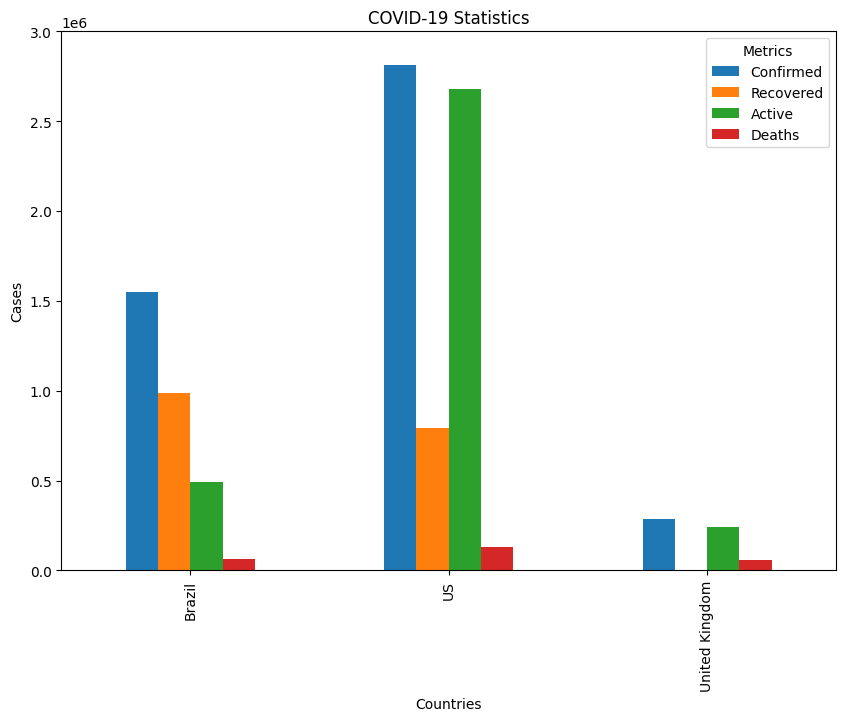

In [127]:
statistics_plot = df.groupby('Country_Region')[['Confirmed', 'Recovered', 'Active', 'Deaths']].sum()
statistics_plot = statistics_plot[statistics_plot['Deaths'] > 50000]
statistics_plot.plot(kind='bar', figsize = (10,7))
plt.title("COVID-19 Statistics")
plt.xlabel("Countries")
plt.ylabel("Cases")
plt.ylim(0, 3000000)
plt.legend(title="Metrics")
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [150]:
import plotly.express as px

In [151]:
covid_data= pd.read_csv('07-03-2020.csv')

In [152]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

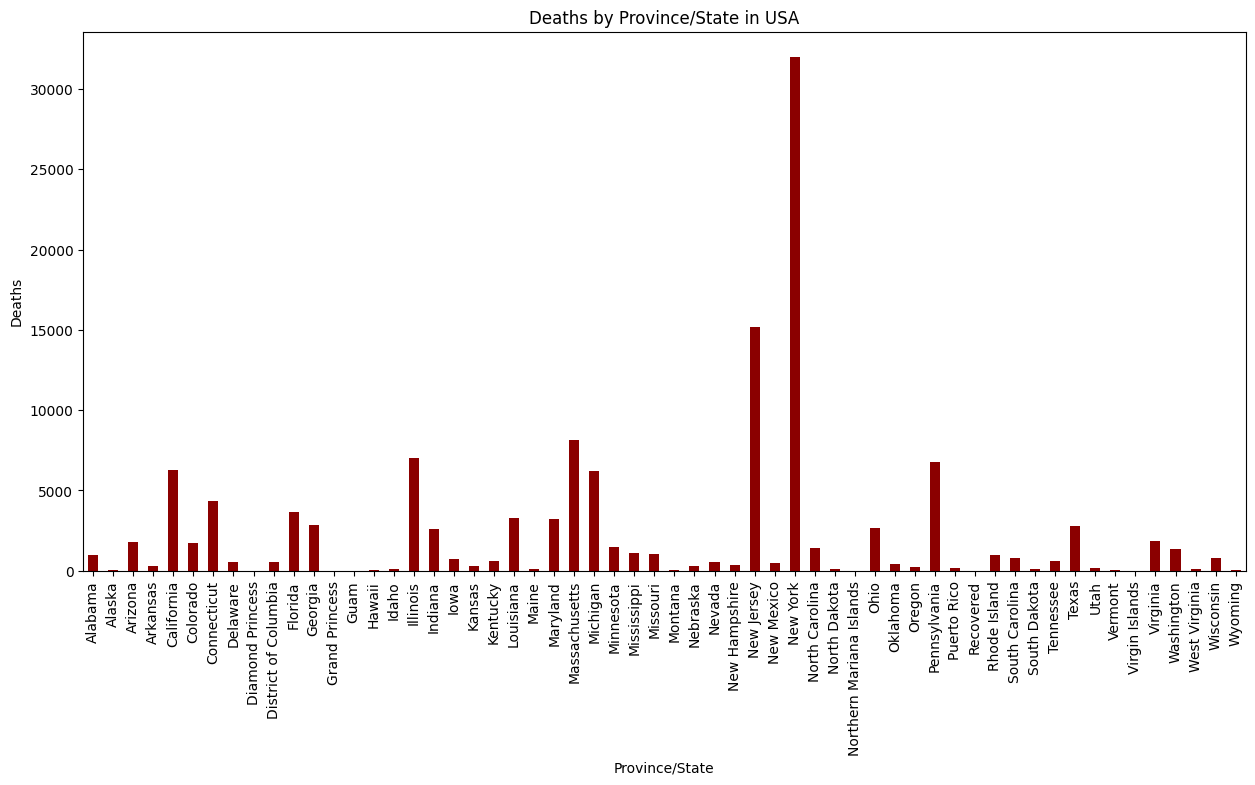

In [153]:
usa_data = covid_data[covid_data['Country_Region']=='US']
deaths_by_province = usa_data.groupby('Province_State')['Deaths'].sum()
# print(deaths_by_province)
deaths_by_province.plot(kind='bar', figsize = (15,7), color = 'darkred')
plt.title("Deaths by Province/State in USA")
plt.xlabel("Province/State")
plt.ylabel("Deaths")
plt.show()


### Question 7

### Plot Province/State Wise Active Cases in USA

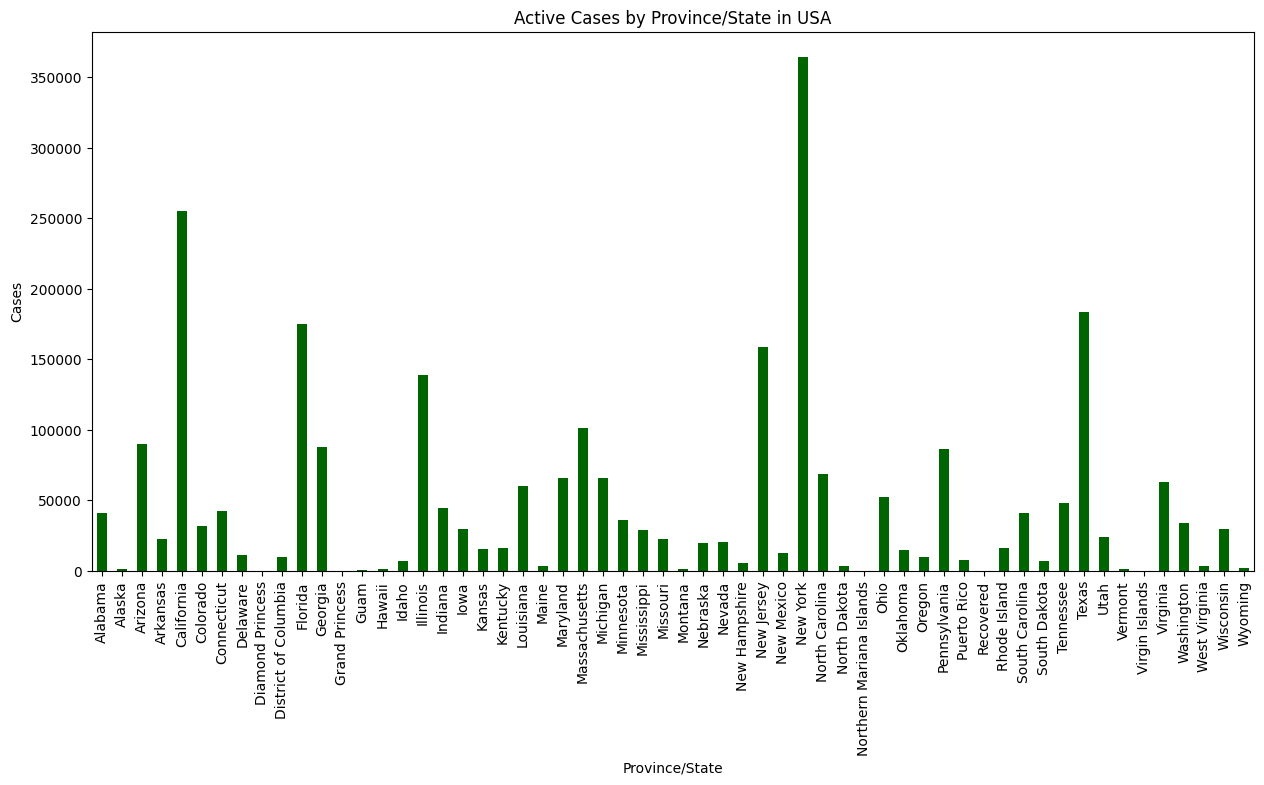

In [132]:
actives_by_province = usa_data.groupby('Province_State')['Active'].sum()
actives_by_province.plot(kind='bar', figsize=(15, 7), color = 'darkgreen')
plt.title("Active Cases by Province/State in USA")
plt.xlabel("Province/State")
plt.ylabel("Cases")
plt.show()


_### Question 8

### Plot Province/State Wise Confirmed cases in USA

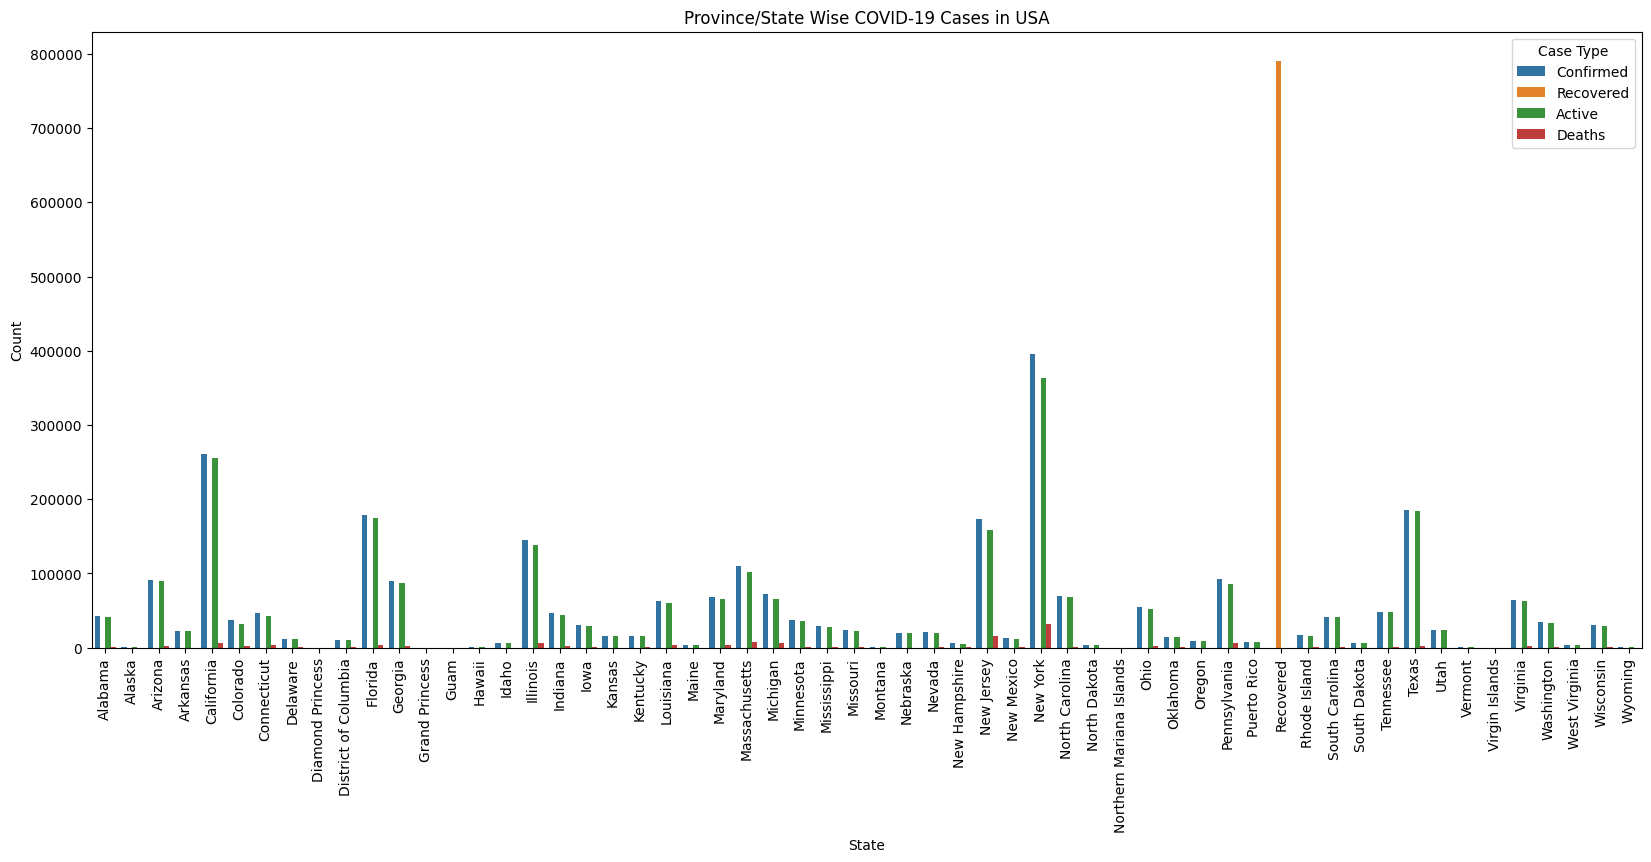

In [139]:
state_cases = usa_data.groupby('Province_State')[['Confirmed', 'Recovered', 'Active', 'Deaths']].sum().reset_index()
state_cases = state_cases.melt(id_vars='Province_State', value_vars=['Confirmed', 'Recovered', 'Active', 'Deaths'], var_name='Case', value_name='Count')

plt.figure(figsize = (20,8))
sns.barplot(data=state_cases, x='Province_State', y='Count', hue='Case')
plt.title("Province/State Wise COVID-19 Cases in USA")
plt.ylabel("Count")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.legend(title="Case Type")
plt.show()


### Question 9

### Plot Worldwide Confirmed Cases over time

In [154]:
import plotly.express as px
import plotly.io as pio

In [162]:
# covid_data.columns

covid_data['Last_Update'] = pd.to_datetime(covid_data['Last_Update'])
confirmed_Cases = covid_data.groupby('Last_Update')['Confirmed'].sum().reset_index()
# print(confirmed_Cases)

plot = px.line(confirmed_Cases, x='Last_Update', y='Confirmed', title='WorldWide COVID-19 Confirmed Cases', labels={'Confirmed': 'Confirmed Cases', 'Last_Update': 'Date'})

plot.show()
